# **Project Overview: Telecom Customer Churn Prediction**

## <span style="color:blue">**Project Objective**</span>

The primary objective of this project is to develop a predictive model that identifies whether a telecom customer will churn (i.e., leave the service) based on their usage patterns and demographic information. The model aims to assist telecom companies in proactively addressing customer churn, thereby improving customer retention strategies and reducing associated costs.

---

## <span style="color:green">**Data Acquisition and Exploration**</span>

**Data Source:**  
The dataset used for this project is the `telecom_churn.csv` file, which contains various features related to customer demographics, service usage, and churn status.

**Data Description:**  
The dataset includes both numerical and categorical features that describe customer profiles and service interactions. Key columns include:
- `Churn` (Target Variable): Indicates if the customer has churned (1) or not (0).
- `State`, `Area code`: Categorical features related to customer location.
- Various numerical features such as `Account Length`, `VMail Message`, etc.

**Initial Steps:**
1. Load the dataset and perform initial exploration to understand its structure and content.
2. Save the original dataset and initial exploration results to CSV files for record-keeping.
3. Generate and save various exploratory visualizations, including histograms, pie charts, correlation heatmaps, and box plots.

---

## <span style="color:orange">**Data Preprocessing**</span>

**Preprocessing Steps:**
1. **Handle Missing Values:** Fill any missing values using forward fill method.
2. **Feature Encoding:** Convert categorical variables into numerical format using one-hot encoding.
3. **Feature Scaling:** Standardize numerical features to ensure consistent scaling across all features.

**Data Cleaning:**
- Drop unnecessary columns that do not contribute to the predictive model.
- Save the preprocessed dataset for model training and validation.

**Visualization After Preprocessing:**
- Histograms, pie charts, and correlation heatmaps to verify changes and understand the preprocessed data.

---

## <span style="color:red">**Feature Selection and Model Building**</span>

**Feature Selection:**
- Define feature variables (`X`) and target variable (`y`).
- Perform train-test split to evaluate model performance on unseen data.

**Model Selection and Training:**
- **Model:** Random Forest Classifier.
- **Hyperparameter Tuning:** Use GridSearchCV to find optimal hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`.

**Model Saving:**
- Save the trained model for future use and deployment.

---

## <span style="color:purple">**Model Evaluation**</span>

**Evaluation Metrics:**
- **Accuracy:** Measure the overall accuracy of the model on the test set.
- **Classification Report:** Evaluate precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Visualize the performance of the model in a matrix format.

**Results Reporting:**
- Save the classification report and confusion matrix for documentation and review.

---

## <span style="color:teal">**Final Deliverables**</span>

1. **Preprocessed Dataset:** `telecom_churn_final.csv`
2. **Exploratory Graphs and Reports:** PDF files containing histograms, pie charts, correlation heatmaps, and other visualizations.
3. **Model Artifacts:**
   - Best model saved as `best_rf_model.pkl`.
   - Classification report and confusion matrix saved as text and PDF files.

## <span style="color:blue">**Import Libraries and Setup**</span>

**Purpose:**  
The purpose of this section is to import the necessary libraries and set up the environment for data analysis, preprocessing, and modeling. Proper library management ensures that the tools required for each step of the project are readily available and function as expected.

---

### <span style="color:green">**Importing Libraries**</span>

1. **Pandas:**  
   - **Usage:** Used for data manipulation and analysis. It provides data structures and functions needed to clean, transform, and analyze data.
   - **Common Functions:** `pd.read_csv()`, `df.head()`, `df.info()`, `df.describe()`

2. **NumPy:**  
   - **Usage:** Essential for numerical operations and handling arrays. It supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
   - **Common Functions:** `np.array()`, `np.mean()`, `np.std()`

3. **Matplotlib and Seaborn:**  
   - **Usage:** Libraries for data visualization. `Matplotlib` is used for creating static, animated, and interactive visualizations, while `Seaborn` builds on Matplotlib to provide a high-level interface for drawing attractive statistical graphics.
   - **Common Functions:**
     - **Matplotlib:** `plt.plot()`, `plt.hist()`, `plt.show()`
     - **Seaborn:** `sns.histplot()`, `sns.heatmap()`, `sns.pairplot()`

4. **Scikit-learn:**  
   - **Usage:** Provides tools for machine learning, including algorithms for classification, regression, clustering, and model evaluation. It includes functions for splitting data, training models, and measuring performance.
   - **Common Functions:** `train_test_split()`, `RandomForestClassifier()`, `accuracy_score()`

5. **Pickle:**  
   - **Usage:** Used for serializing and deserializing Python objects. It helps in saving and loading models or other objects to and from disk.
   - **Common Functions:** `pickle.load()`, `pickle.dump()`

---

### <span style="color:orange">**Setup Configuration**</span>

- **Setting Up Environment:**  
  - **Purpose:** Configure environment settings such as plotting styles and figure sizes to ensure consistent visualization outputs.
  - **Example:** `plt.style.use('seaborn-darkgrid')` sets the style for Matplotlib plots to `seaborn-darkgrid`.

- **Defining Constants and Variables:**  
  - **Purpose:** Set up constants for file paths, target variables, and any other parameters that will be used throughout the project.
  - **Example:** `DATA_FILE_PATH = '/content/telecom_churn.csv'` defines the path to the dataset.

- **Import Statements:**  
  - **Purpose:** Execute the import statements to load all necessary libraries into the workspace. This step is crucial for ensuring that all functions and classes needed for the project are available for use.

In [14]:
# Step 1: Import Libraries and Setup

In [15]:
import pandas as pd  # Importing pandas for data manipulation and analysis

In [16]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs

In [17]:
import seaborn as sns  # Importing seaborn for advanced visualization

In [18]:
import joblib  # Importing joblib for saving and loading models

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV  # Importing functions for splitting data and hyperparameter tuning


In [20]:
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for the machine learning model


In [21]:
from sklearn.metrics import accuracy_score, classification_report  # Importing functions for model evaluation


In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # StandardScaler: Standardizes features by removing the mean and scaling to unit variance. OneHotEncoder: Converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.


In [79]:
from sklearn.compose import ColumnTransformer  # ColumnTransformer: Applies transformers to specific columns of the dataset, allowing for different preprocessing steps on different columns.


In [80]:
from sklearn.pipeline import Pipeline  # Pipeline: A way to streamline a sequence of data processing steps, making the code cleaner and easier to manage.


In [22]:
import warnings  # Importing warnings to handle warnings in the code

In [23]:
# Filter warnings

In [24]:
warnings.filterwarnings('ignore')  # Ignoring warnings to keep the output clean

## <span style="color:blue">**Data Acquisition and Exploration**</span>

**Purpose:**  
This section focuses on acquiring the dataset, performing initial explorations to understand its structure, and preparing it for subsequent analysis. Proper data acquisition and exploration are critical for ensuring data quality and informing the preprocessing steps.

---

### <span style="color:green">**Data Acquisition**</span>

1. **Loading the Dataset:**  
   - **Purpose:** To load the dataset into a DataFrame for further analysis. The dataset is typically loaded from a CSV file or other data formats.
   - **Common Functions:** `pd.read_csv()`
   - **Example:**
     ```python
     df = pd.read_csv(DATA_FILE_PATH)
     ```

2. **Checking the Data Structure:**  
   - **Purpose:** To examine the general structure of the dataset including the number of rows and columns, data types of columns, and sample data. This helps in understanding the dataset's format and identifying any immediate issues.
   - **Common Functions:**
     - `df.shape` (returns the number of rows and columns)
     - `df.info()` (provides data types and non-null counts)
     - `df.head()` (displays the first few rows of the DataFrame)

---

### <span style="color:orange">**Data Exploration**</span>

1. **Descriptive Statistics:**  
   - **Purpose:** To compute and display summary statistics for numerical columns, such as mean, standard deviation, min, and max values. This provides insights into the distribution and range of the data.
   - **Common Functions:** `df.describe()`
   - **Example:**
     ```python
     df.describe()
     ```

2. **Data Distribution:**  
   - **Purpose:** To visualize the distribution of key variables using histograms and box plots. This helps in understanding the data distribution and identifying potential outliers or skewness.
   - **Common Visualizations:**
     - **Histograms:** `sns.histplot(df['column_name'])`
     - **Box Plots:** `sns.boxplot(x='column_name', data=df)`

3. **Missing Values Analysis:**  
   - **Purpose:** To identify any missing or null values in the dataset and determine their impact. Understanding missing data helps in deciding how to handle it (e.g., imputation or removal).
   - **Common Functions:**
     - `df.isnull().sum()` (counts missing values per column)
     - `df.dropna()` (removes rows with missing values)
     - `df.fillna()` (fills missing values with specified values)

4. **Correlation Analysis:**  
   - **Purpose:** To compute and visualize correlations between numerical features. Correlation analysis helps in understanding relationships between variables and identifying multicollinearity.
   - **Common Functions and Visualizations:**
     - **Correlation Matrix:** `df.corr()`
     - **Heatmap:** `sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`

---

### <span style="color:red">**Key Insights and Next Steps**</span>

1. **Key Insights:**  
   - **Purpose:** Summarize the key findings from the exploration phase, such as data quality issues, important features, and any patterns observed in the dataset.
   - **Example:** Noting any significant correlations, missing data patterns, or distribution characteristics.

2. **Next Steps:**  
   - **Purpose:** Outline the actions required based on the exploration findings. This typically involves data cleaning, feature engineering, and preparing the data for modeling.
   - **Example:** Deciding to handle missing values, normalize data, or create new features.

In [25]:
# Step 2: Data Acquisition and Exploration

In [26]:
# Load the dataset

In [27]:
file_path = "/content/telecom_churn.csv"  # Path to the dataset file

In [28]:
df = pd.read_csv(file_path)  # Loading the dataset into a DataFrame

In [29]:
# Display the first few rows of the dataset

In [30]:
print("First 5 rows of the dataset:")  # Printing a message
print(df.head(), "\n")  # Displaying the first 5 rows of the dataset

First 5 rows of the dataset:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16

In [31]:
# Save the initial dataset to CSV

In [32]:
df.to_csv('/content/telecom_churn_initial.csv', index=False)  # Saving the initial dataset to a CSV file


In [33]:
# Print dataset info

In [34]:
print("Dataset Information:")
print(df.info())  # Printing the dataset information including column types and non-null counts

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge 

In [35]:
# Save dataset info

In [36]:
with open('/content/dataset_info.txt', 'w') as f:  # Opening a file to save dataset info
    f.write("Dataset Information:\n")
    f.write(str(df.info()))  # Writing dataset info to the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [37]:
# Print summary statistics

In [38]:
print("Summary Statistics:")
print(df.describe())  # Printing summary statistics of the dataset

Summary Statistics:
       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069

In [39]:
# Save summary statistics

In [40]:
with open('/content/summary_statistics.txt', 'w') as f:  # Opening a file to save summary statistics
    f.write("Summary Statistics:\n")
    f.write(str(df.describe()))  # Writing summary statistics to the file

In [61]:
# Check for missing values

In [65]:
missing_values = df.isnull().sum()

In [66]:
print("Missing Values:")
print(missing_values[missing_values > 0])  # Print columns with missing values
print("\n")

Missing Values:
Series([], dtype: int64)




In [43]:
# Save the initial dataset to CSV

In [44]:
df.to_csv('/content/telecom_churn_initial.csv', index=False)  # Saving the initial dataset to a CSV file


In [45]:
# Plotting graphs

In [46]:
# Histogram of numeric features

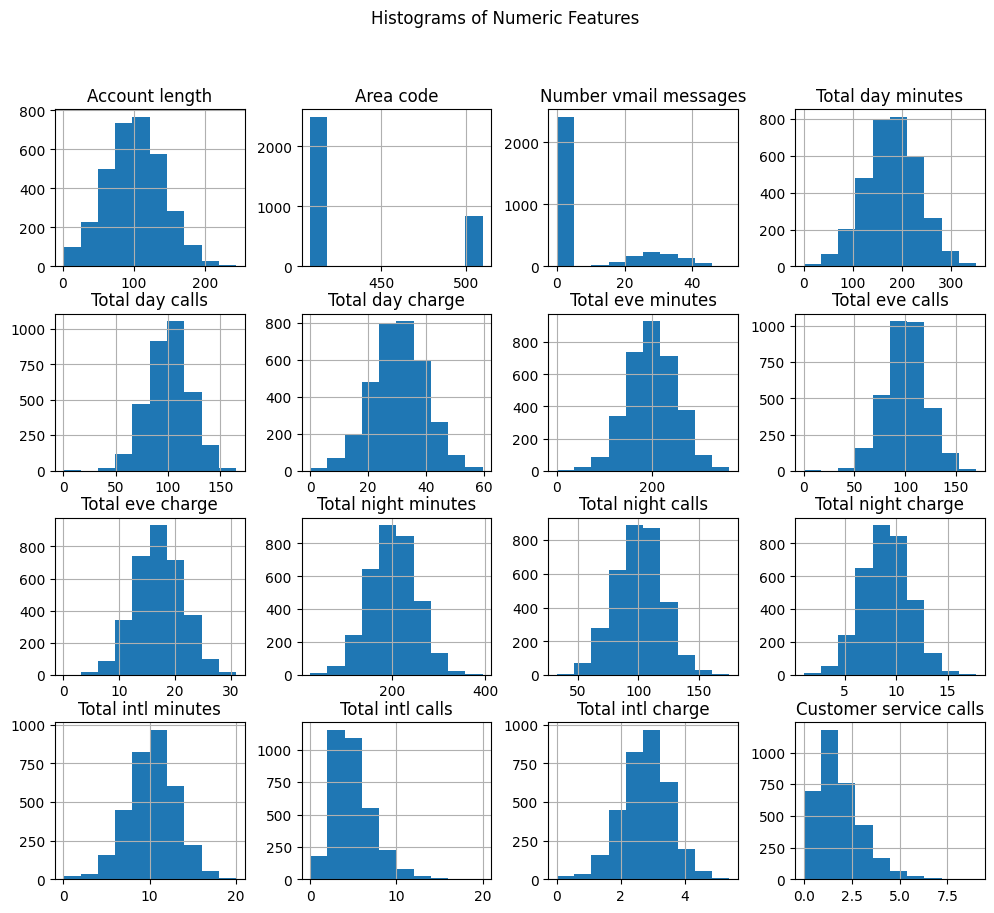

In [47]:
df.hist(figsize=(12, 10))  # Creating histograms for numeric features in the dataset
plt.suptitle('Histograms of Numeric Features')  # Adding a title to the histograms
plt.savefig('/content/histograms.pdf')  # Saving the histograms as a PDF file
plt.show()  # Displaying the histograms

In [48]:
# Pie chart for target variable distribution

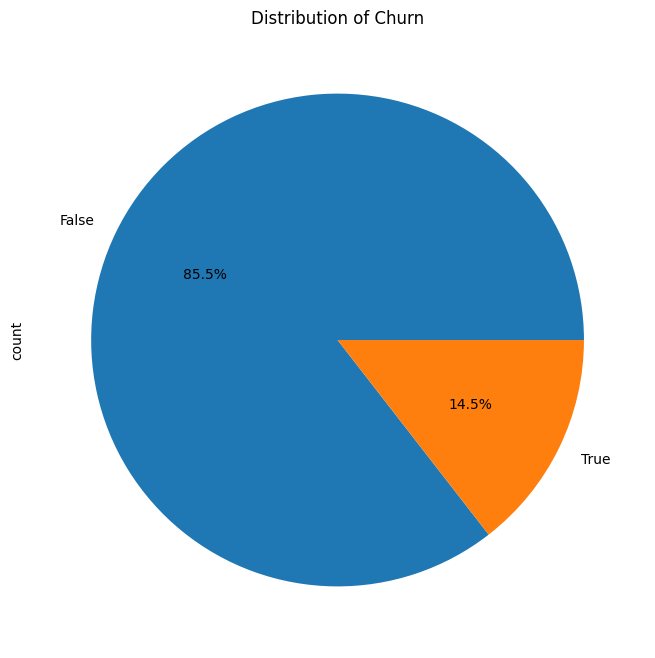

In [49]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))  # Creating a pie chart for the distribution of the target variable
plt.title('Distribution of Churn')  # Adding a title to the pie chart
plt.savefig('/content/pie_chart_churn.pdf')  # Saving the pie chart as a PDF file
plt.show()  # Displaying the pie chart

In [50]:
# Correlation heatmap for numeric features only

In [51]:
numeric_df = df.select_dtypes(include=['number'])  # Selecting only numeric columns for correlation heatmap


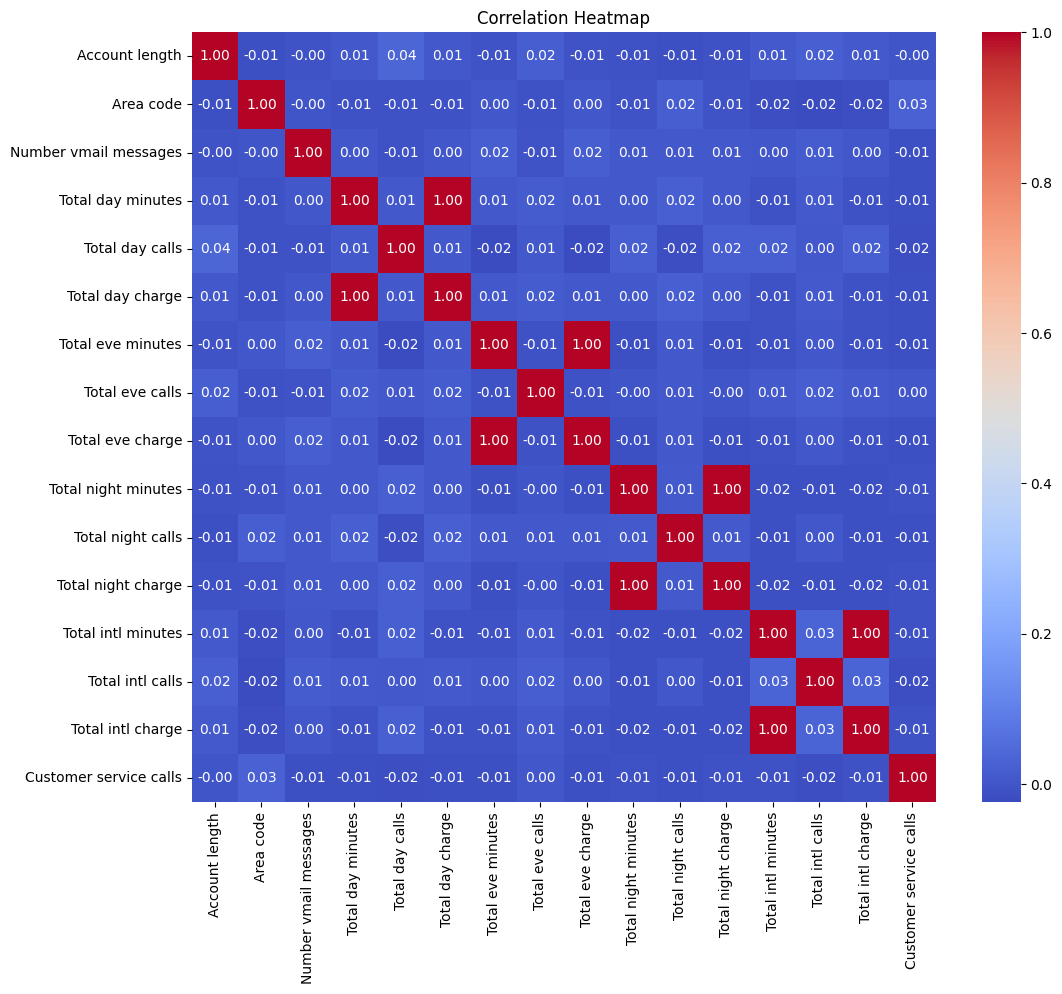

In [52]:
plt.figure(figsize=(12, 10))  # Setting the figure size
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Creating a heatmap to visualize correlations between numeric features
plt.title('Correlation Heatmap')  # Adding a title to the heatmap
plt.savefig('/content/heatmap.pdf')  # Saving the heatmap as a PDF file
plt.show()  # Displaying the heatmap

In [139]:
# Bar chart for the count of unique values in categorical features

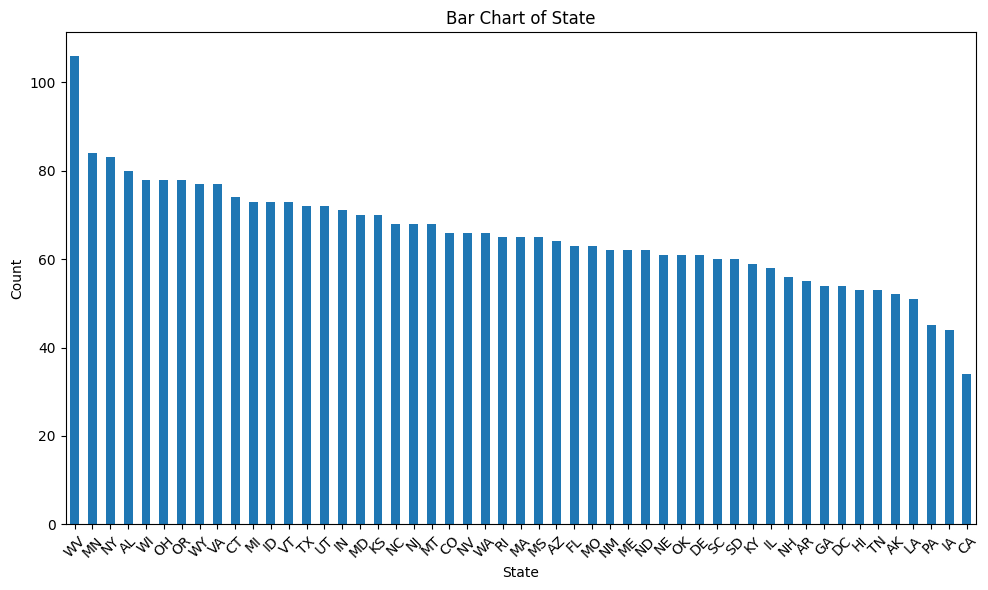

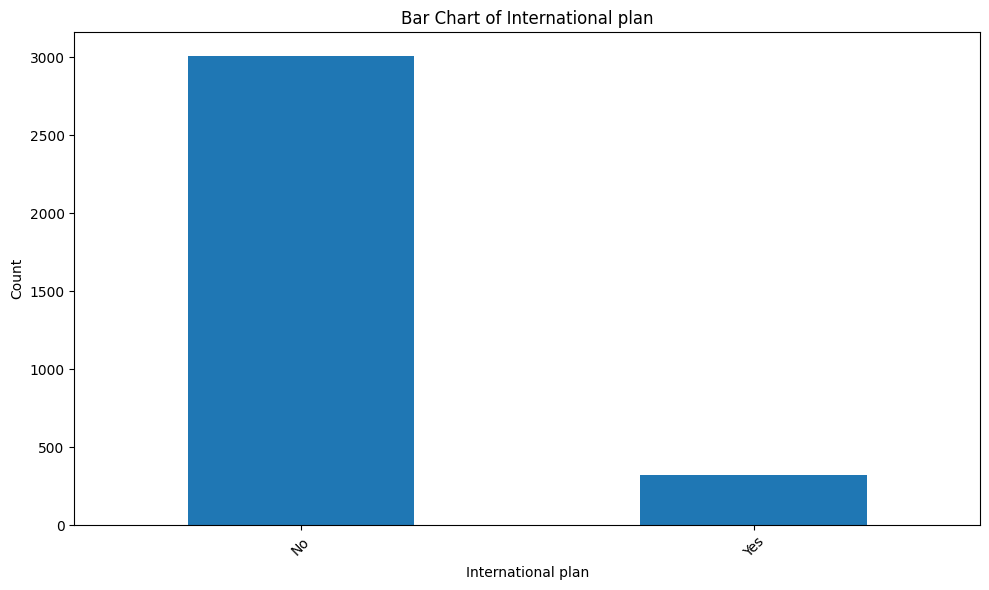

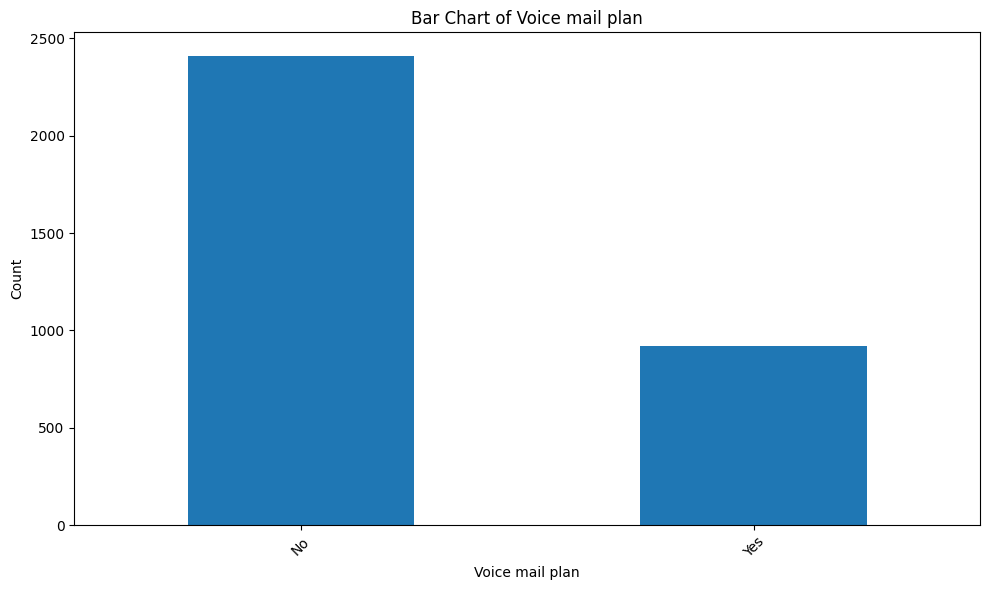

In [140]:
for col in df.select_dtypes(include=['object']).columns:  # Iterate over categorical columns
    plt.figure(figsize=(10, 6))  # Set figure size
    df[col].value_counts().plot(kind='bar')  # Plot bar chart for the count of unique values
    plt.title(f'Bar Chart of {col}')  # Title for the bar chart
    plt.xlabel(col)  # X-axis label
    plt.ylabel('Count')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(f'/content/bar_chart_{col}.pdf')  # Save bar chart to a PDF file
    plt.show()  # Display the bar chart

In [141]:
# Box plot for numeric features

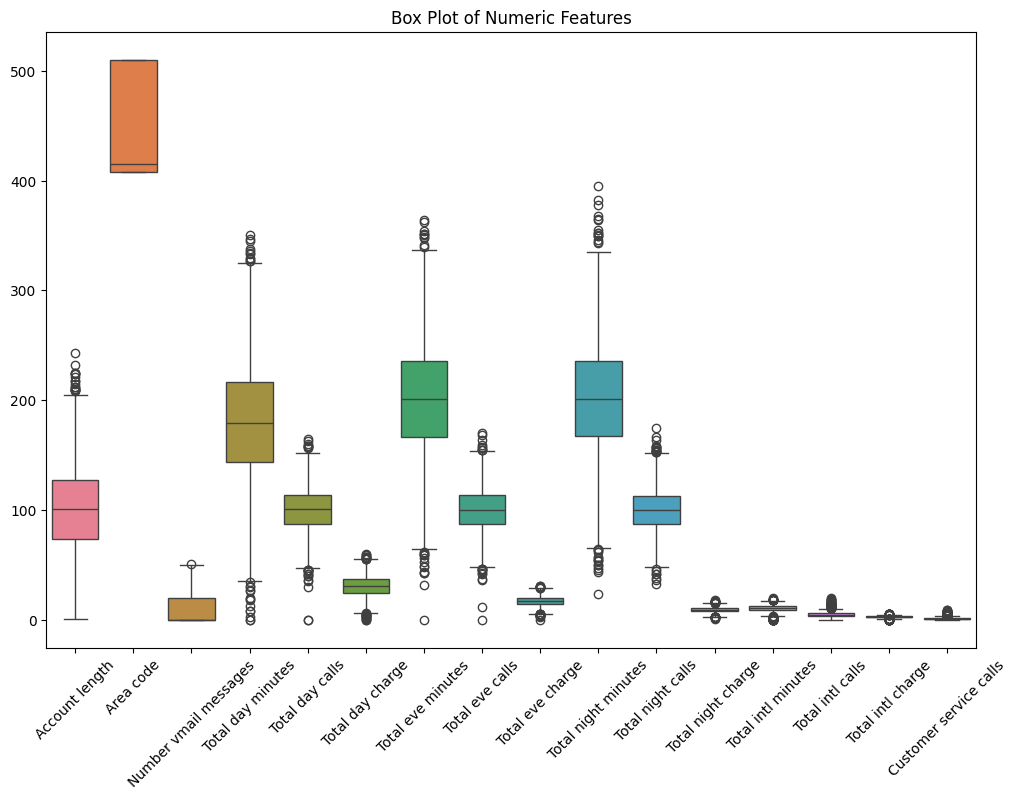

In [142]:
plt.figure(figsize=(12, 8))  # Set figure size
sns.boxplot(data=df.select_dtypes(include=['number']))  # Create box plot for numeric features
plt.title('Box Plot of Numeric Features')  # Title for the box plot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.savefig('/content/box_plot_initial.pdf')  # Save box plot to a PDF file
plt.show()  # Display the box plot

In [146]:
# Pair plot for visualizing relationships between numeric features

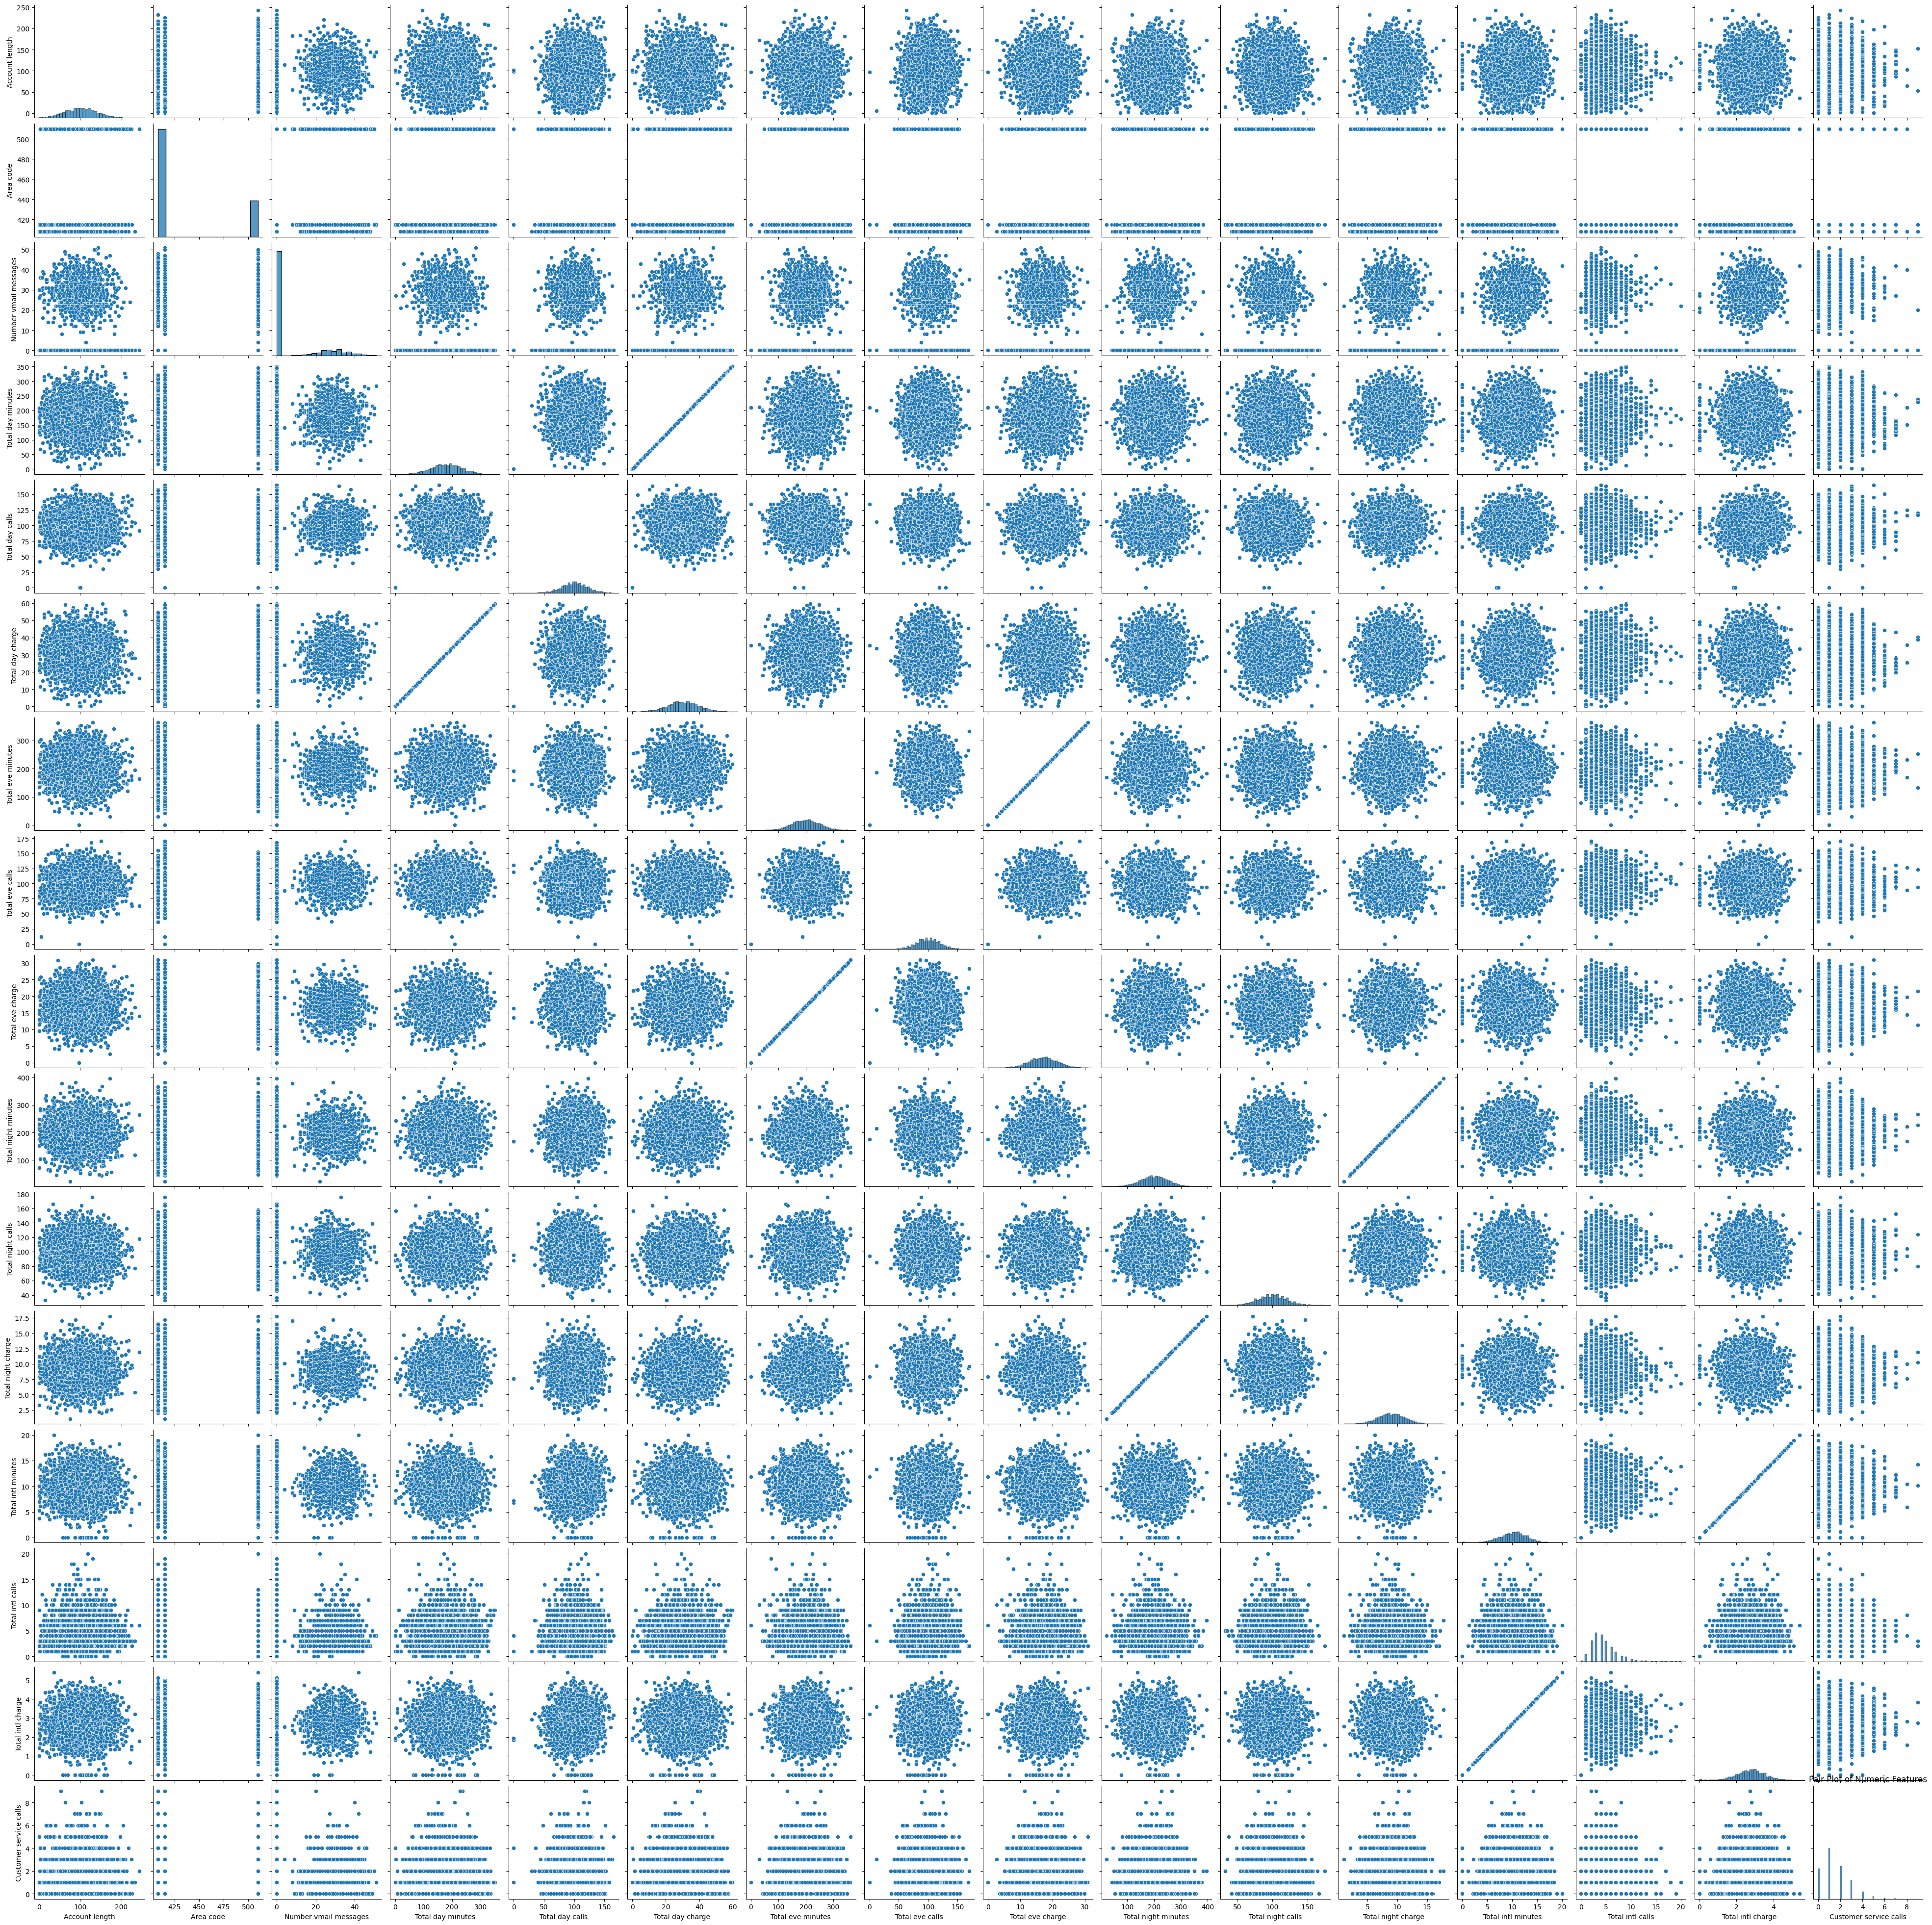

In [147]:
sns.pairplot(numeric_df)  # Create pair plot for numeric features
plt.title('Pair Plot of Numeric Features')  # Title for the pair plot
plt.savefig('/content/pair_plot_initial.pdf')  # Save pair plot to a PDF file
plt.show()  # Display the pair plot

## <span style="color:blue">**Data Preprocessing**</span>

**Purpose:**  
Data preprocessing involves cleaning and preparing the data for modeling. This step ensures that the data is in the right format, free of inconsistencies, and ready for analysis. Proper preprocessing is crucial for building robust and accurate models.

---

### <span style="color:green">**Handling Missing Values**</span>

1. **Identifying Missing Values:**  
   - **Purpose:** To detect missing or null values in the dataset. Identifying these values is the first step in deciding how to handle them.
   - **Common Functions:**
     - `df.isnull().sum()` (counts missing values per column)
     - `df.isna().sum()` (alternative function for detecting missing values)

2. **Strategies for Missing Data:**  
   - **Purpose:** To decide on an appropriate method for addressing missing values based on their impact and the data's nature.
   - **Common Strategies:**
     - **Removal:** `df.dropna()` (removes rows with missing values)
     - **Imputation:**
       - **Mean/Median Imputation:** `df.fillna(df['column_name'].mean())` or `df.fillna(df['column_name'].median())`
       - **Mode Imputation:** `df.fillna(df['column_name'].mode()[0])`
       - **Custom Value:** `df.fillna(value=custom_value)`

---

### <span style="color:orange">**Feature Engineering**</span>

1. **Creating New Features:**  
   - **Purpose:** To generate new features from existing ones to improve model performance. New features can capture additional information or patterns not present in the original data.
   - **Example:** Creating interaction terms or extracting date components from datetime columns.
   - **Common Techniques:**
     - **Date Features:** Extract year, month, day, etc. from datetime columns.
     - **Binning:** Convert continuous variables into categorical bins.

2. **Encoding Categorical Variables:**  
   - **Purpose:** To convert categorical features into a numerical format that can be used by machine learning algorithms.
   - **Common Techniques:**
     - **Label Encoding:** `from sklearn.preprocessing import LabelEncoder` followed by `LabelEncoder().fit_transform(df['categorical_column'])`
     - **One-Hot Encoding:** `pd.get_dummies(df['categorical_column'])` or `pd.get_dummies(df, columns=['categorical_column'])`

3. **Feature Scaling:**  
   - **Purpose:** To standardize or normalize numerical features to ensure that they contribute equally to the model. Scaling helps improve model convergence and performance.
   - **Common Techniques:**
     - **Standardization:** `from sklearn.preprocessing import StandardScaler` followed by `StandardScaler().fit_transform(df[['numerical_column']])`
     - **Normalization:** `from sklearn.preprocessing import MinMaxScaler` followed by `MinMaxScaler().fit_transform(df[['numerical_column']])`

---

### <span style="color:red">**Data Transformation**</span>

1. **Handling Outliers:**  
   - **Purpose:** To identify and manage outliers that may skew the analysis or model performance. Outliers can be detected using statistical methods or visualizations.
   - **Common Techniques:**
     - **Statistical Methods:** Z-scores or IQR method for identifying outliers.
     - **Visualization:** Box plots or scatter plots.

2. **Data Transformation:**  
   - **Purpose:** To transform data to better fit the assumptions of machine learning models. Transformation can involve log transformations, power transformations, or other methods.
   - **Common Techniques:**
     - **Log Transformation:** `df['column_name'] = np.log(df['column_name'] + 1)`
     - **Power Transformation:** `from sklearn.preprocessing import PowerTransformer` followed by `PowerTransformer().fit_transform(df[['column_name']])`

---

### <span style="color:purple">**Summary and Next Steps**</span>

1. **Summary:**  
   - **Purpose:** Summarize the preprocessing steps performed and any key changes made to the dataset. This helps in understanding the final state of the data before modeling.
   - **Example:** Noting which features were created, how missing values were handled, and any scaling or encoding applied.

2. **Next Steps:**  
   - **Purpose:** Outline the subsequent steps in the data analysis or modeling process. This typically involves splitting the data into training and test sets and selecting appropriate algorithms.
   - **Example:** Preparing the data for model training and evaluation.

In [53]:
# Step 3: Data Preprocessing

In [54]:
# Drop unnecessary columns

In [55]:
data = df.drop(columns=['State', 'Area code'])  # Dropping columns that are not needed for analysis

In [68]:
# Handle missing values (if any left)

In [69]:
data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity

In [70]:
# Alternatively, you can use other strategies like mean imputation or dropping rows/columns

In [71]:
# Encode categorical variables

In [72]:
data = pd.get_dummies(data, drop_first=True)  # Encoding categorical variables

In [73]:
# Scale numerical features

In [76]:
scaler = StandardScaler()  # Initialize the scaler

In [77]:
scaled_features = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))  # Scale numerical features


In [81]:
# Save updated dataset to CSV

In [82]:
data.to_csv('/content/telecom_churn_preprocessed.csv', index=False)  # Saving the dataset after dropping unnecessary columns to a CSV file


In [83]:
# Display updated dataset details

In [84]:
print("Preprocessed Data:")  # Printing a message
print(data.head(), "\n")  # Displaying the first 5 rows of the preprocessed dataset

Preprocessed Data:
   Account length  Number vmail messages  Total day minutes  Total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night c

In [85]:
print("Summary Statistics of Preprocessed Data:")  # Printing a message
print(data.describe(), "\n")  # Displaying summary statistics of the preprocessed dataset

Summary Statistics of Preprocessed Data:
       Account length  Number vmail messages  Total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.0

In [86]:
# Histograms after preprocessing

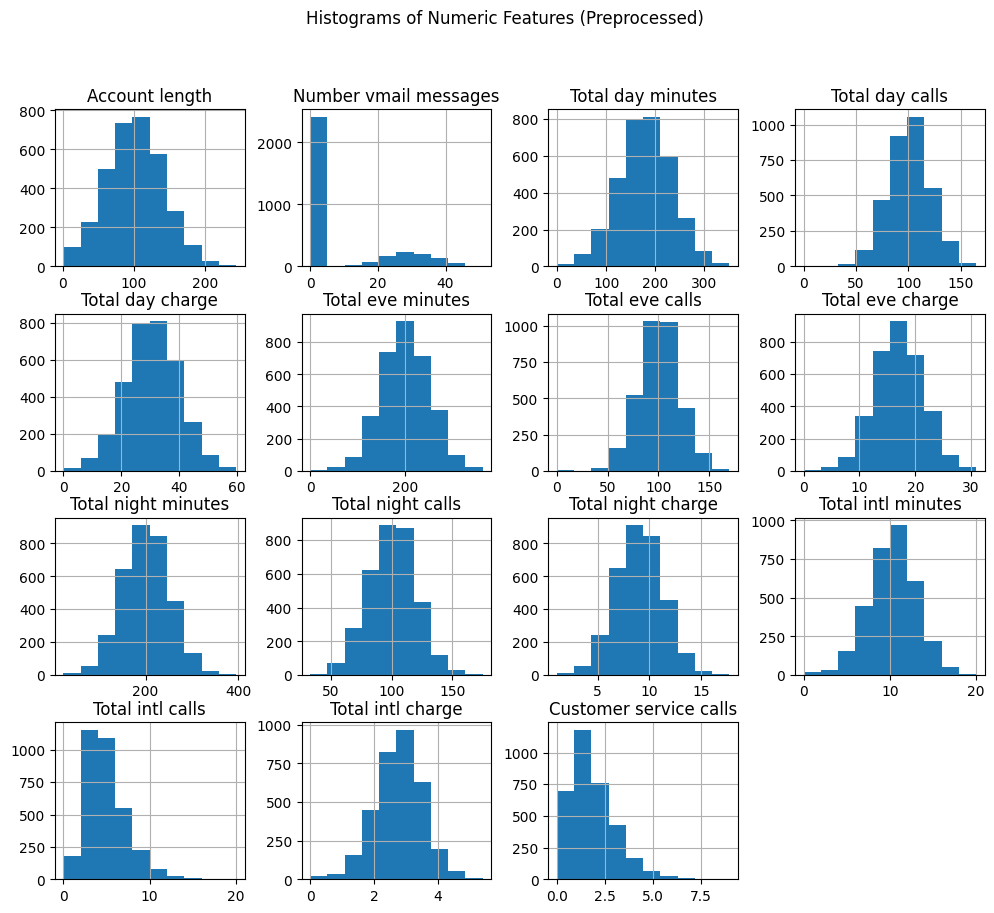

In [87]:
data.hist(figsize=(12, 10))  # Creating histograms for numeric features after preprocessing
plt.suptitle('Histograms of Numeric Features (Preprocessed)')  # Adding a title to the histograms
plt.savefig('/content/histograms_preprocessed.pdf')  # Saving the histograms after preprocessing as a PDF file
plt.show()  # Displaying the histograms

In [88]:
# Pie chart for target variable distribution after preprocessing

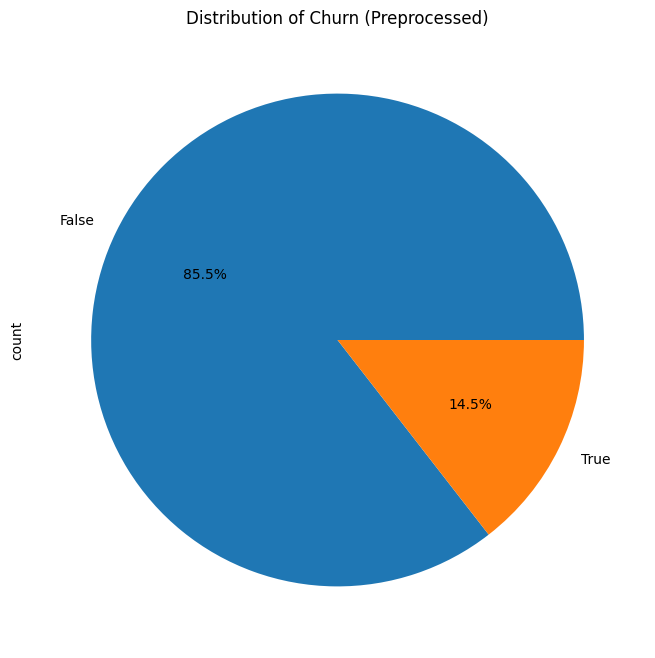

In [89]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))  # Creating a pie chart for the distribution of the target variable after preprocessing
plt.title('Distribution of Churn (Preprocessed)')  # Adding a title to the pie chart
plt.savefig('/content/pie_chart_churn_preprocessed.pdf')  # Saving the pie chart after preprocessing as a PDF file
plt.show()  # Displaying the pie chart

In [90]:
# Correlation heatmap after preprocessing

In [91]:
numeric_data = data.select_dtypes(include=['number'])  # Selecting only numeric columns for correlation heatmap after preprocessing


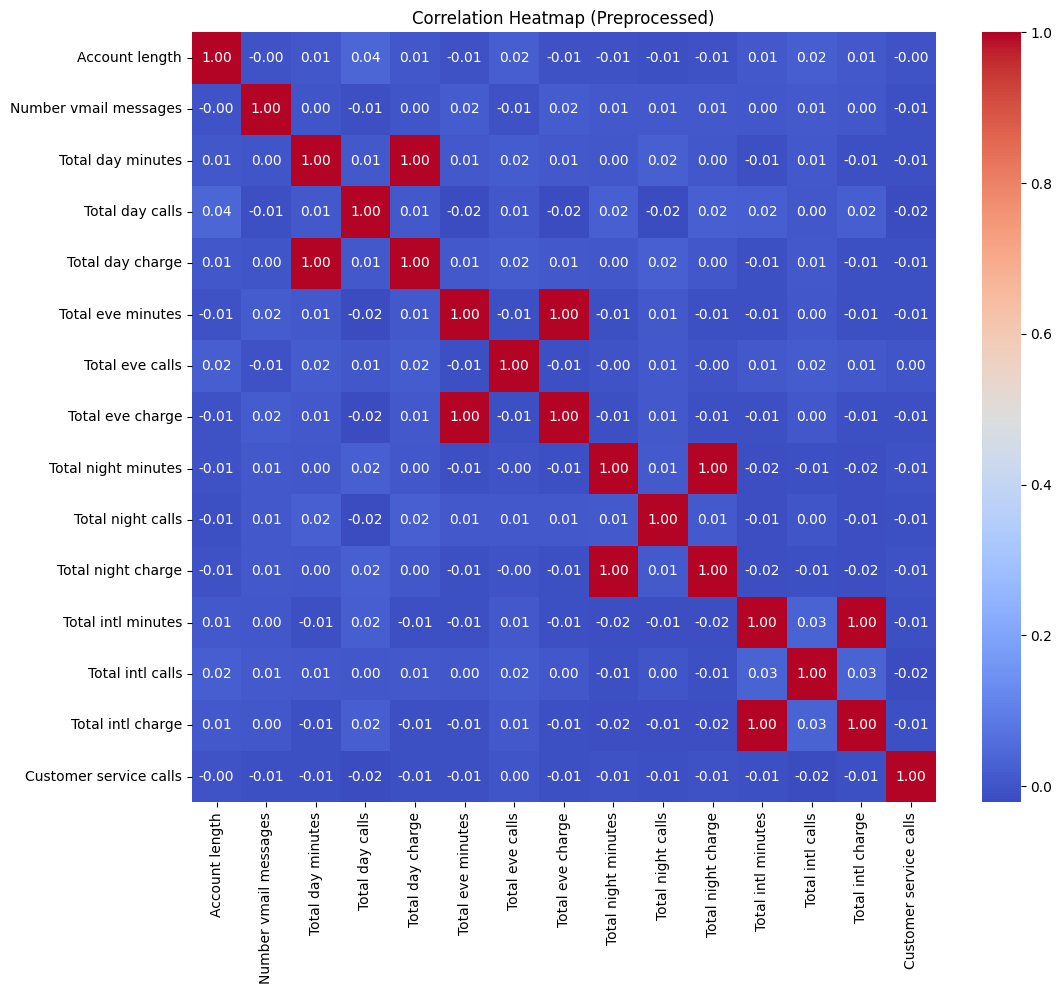

In [92]:
plt.figure(figsize=(12, 10))  # Setting the figure size
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Creating a heatmap to visualize correlations between numeric features after preprocessing
plt.title('Correlation Heatmap (Preprocessed)')  # Adding a title to the heatmap
plt.savefig('/content/heatmap_preprocessed.pdf')  # Saving the heatmap after preprocessing as a PDF file
plt.show()  # Displaying the heatmap

In [93]:
# Convert the target variable to binary (0 for Non-Churn, 1 for Churn)

In [94]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)  # Converting the target variable to binary values


In [95]:
# Convert categorical variables to dummy variables

In [96]:
data = pd.get_dummies(data, drop_first=True)  # Converting categorical variables to dummy variables and dropping the first category


In [97]:
# Save the final preprocessed dataset to CSV

In [98]:
data.to_csv('/content/telecom_churn_final.csv', index=False)  # Saving the final preprocessed dataset to a CSV file


## <span style="color:blue">**Feature Selection**</span>

**Purpose:**  
Feature selection is the process of identifying and selecting the most relevant features (or variables) for use in model building. Effective feature selection helps improve model performance, reduce overfitting, and decrease computational cost.

---

### <span style="color:green">**Feature Importance**</span>

1. **Purpose:**  
   - To evaluate and rank the features based on their contribution to the predictive power of the model. This helps in understanding which features have the most significant impact on the target variable.

2. **Methods:**  
   - **Tree-based Methods:**
     - **Example:** Random Forest or Gradient Boosting models can provide feature importance scores.
     - **Code:**
       ```python
       from sklearn.ensemble import RandomForestClassifier
       model = RandomForestClassifier()
       model.fit(X_train, y_train)
       feature_importances = model.feature_importances_
       ```
   - **Correlation Analysis:**
     - **Purpose:** To assess the linear relationship between features and the target variable.
     - **Code:**
       ```python
       correlation_matrix = df.corr()
       ```
     - **Visualization:** Use heatmaps to visualize correlations.
       ```python
       import seaborn as sns
       import matplotlib.pyplot as plt
       sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
       plt.show()
       ```

---

### <span style="color:orange">**Dimensionality Reduction**</span>

1. **Purpose:**  
   - To reduce the number of features while retaining as much information as possible. This can help in simplifying the model and improving its performance.

2. **Techniques:**  
   - **Principal Component Analysis (PCA):**
     - **Purpose:** To transform features into a lower-dimensional space while retaining the maximum variance.
     - **Code:**
       ```python
       from sklearn.decomposition import PCA
       pca = PCA(n_components=number_of_components)
       X_reduced = pca.fit_transform(X)
       ```
   - **Recursive Feature Elimination (RFE):**
     - **Purpose:** To recursively remove less important features and select the best ones.
     - **Code:**
       ```python
       from sklearn.feature_selection import RFE
       from sklearn.linear_model import LogisticRegression
       model = LogisticRegression()
       rfe = RFE(model, n_features_to_select=number_of_features)
       fit = rfe.fit(X_train, y_train)
       ```

---

### <span style="color:red">**Feature Selection Techniques**</span>

1. **Filter Methods:**  
   - **Purpose:** To select features based on statistical tests.
   - **Example:** Using ANOVA F-statistic for classification tasks.
   - **Code:**
     ```python
     from sklearn.feature_selection import SelectKBest
     from sklearn.feature_selection import f_classif
     selector = SelectKBest(score_func=f_classif, k=number_of_features)
     X_new = selector.fit_transform(X, y)
     ```

2. **Wrapper Methods:**  
   - **Purpose:** To evaluate feature subsets based on model performance.
   - **Example:** Using forward or backward selection with cross-validation.
   - **Code:**
     ```python
     from sklearn.feature_selection import SequentialFeatureSelector
     sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=number_of_features)
     X_sfs = sfs.fit_transform(X, y)
     ```

3. **Embedded Methods:**  
   - **Purpose:** To incorporate feature selection within the model training process.
   - **Example:** Using Lasso Regression for feature selection based on regularization.
   - **Code:**
     ```python
     from sklearn.linear_model import Lasso
     model = Lasso(alpha=1.0)
     model.fit(X_train, y_train)
     selected_features = X_train.columns[(model.coef_ != 0)]
     ```

---

### <span style="color:purple">**Summary and Next Steps**</span>

1. **Summary:**  
   - **Purpose:** Summarize the feature selection process and highlight the most relevant features. This helps in understanding the reduced feature set used for modeling.
   - **Example:** Noting the top features selected and their importance scores.

2. **Next Steps:**  
   - **Purpose:** Outline the next steps in the modeling process after feature selection. This typically involves model training and evaluation using the selected features.
   - **Example:** Preparing the dataset with selected features for model building and performance evaluation.

In [99]:
# Step 4: Feature Selection

In [100]:
# Define the feature variables (X) and the target variable (y)

In [101]:
X = data.drop(columns=['Churn'])  # Defining the feature variables by dropping the target variable

In [102]:
y = data['Churn']  # Defining the target variable

## <span style="color:blue">**Splitting the Data**</span>

**Purpose:**  
Splitting the data involves dividing the dataset into separate subsets for training and testing. This ensures that the model is evaluated on unseen data, which helps in assessing its generalization performance and prevents overfitting.

---

### <span style="color:green">**Train-Test Split**</span>

1. **Purpose:**  
   - To partition the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on new, unseen data.

2. **Method:**  
   - **Using `train_test_split` from `sklearn`:** This function randomly splits the dataset into specified proportions for training and testing.
   - **Code:**
     ```python
     from sklearn.model_selection import train_test_split

     # Define the features and target variable
     X = df[features]  # Replace with actual feature columns
     y = df[target]    # Replace with actual target column

     # Split the data
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     ```

---

### <span style="color:orange">**Stratified Split**</span>

1. **Purpose:**  
   - To maintain the distribution of the target variable across the training and testing sets, especially for imbalanced datasets. This ensures that both sets represent the same class distribution.

2. **Method:**  
   - **Using `StratifiedShuffleSplit`:** This variant of `train_test_split` ensures stratified sampling.
   - **Code:**
     ```python
     from sklearn.model_selection import StratifiedShuffleSplit

     # Define the split
     sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

     for train_index, test_index in sss.split(X, y):
         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     ```

---

### <span style="color:red">**Validation Set**</span>

1. **Purpose:**  
   - To further split the training set into training and validation subsets. The validation set is used to tune model parameters and select the best model configuration before final testing.

2. **Method:**  
   - **Using Nested Split:** This involves an additional split within the training data.
   - **Code:**
     ```python
     from sklearn.model_selection import train_test_split

     # Split the training data further into training and validation sets
     X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
     ```

---

### <span style="color:purple">**Summary and Next Steps**</span>

1. **Summary:**  
   - **Purpose:** Summarize the data splitting process, including the proportions used for training, validation, and testing. This helps in understanding how the data is allocated for model evaluation.
   - **Example:** Indicate the sizes of the training, validation, and testing sets.

2. **Next Steps:**  
   - **Purpose:** Outline the next steps in the modeling pipeline, typically involving model training and evaluation using the split datasets.
   - **Example:** Begin training the model using the training set, tuning parameters with the validation set, and evaluating performance on the testing set.

In [103]:
# Step 5: Splitting the Data

In [104]:
# Split the data into training and testing sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets


## <span style="color:blue">**Model Training**</span>

**Purpose:**  
Model training involves using the training dataset to build and optimize machine learning models. The goal is to find the best model parameters that minimize the error on the training data, which will ideally generalize well to unseen data.

---

### <span style="color:green">**Model Selection**</span>

1. **Purpose:**  
   - To choose the appropriate machine learning model based on the problem type (e.g., classification, regression) and dataset characteristics.

2. **Common Models:**
   - **Linear Regression:** For predicting continuous values.
   - **Logistic Regression:** For binary classification problems.
   - **Decision Trees / Random Forests:** For both classification and regression, offering high interpretability and performance.
   - **Support Vector Machines (SVM):** Effective in high-dimensional spaces for classification.
   - **Neural Networks:** For complex patterns and large datasets.

---

### <span style="color:orange">**Model Training Process**</span>

1. **Purpose:**  
   - To train the selected model using the training data, adjusting its parameters to minimize the error and improve performance.

2. **Method:**
   - **Using Scikit-learn:**
     - **Linear Regression Example:**
       ```python
       from sklearn.linear_model import LinearRegression

       # Initialize the model
       model = LinearRegression()

       # Fit the model to the training data
       model.fit(X_train, y_train)
       ```
     - **Random Forest Example:**
       ```python
       from sklearn.ensemble import RandomForestClassifier

       # Initialize the model
       model = RandomForestClassifier(n_estimators=100, random_state=42)

       # Fit the model to the training data
       model.fit(X_train, y_train)
       ```

---

### <span style="color:red">**Hyperparameter Tuning**</span>

1. **Purpose:**  
   - To optimize model performance by adjusting hyperparameters, which are the external configurations not learned from the training data.

2. **Method:**
   - **Grid Search:** Evaluates a predefined set of hyperparameters.
     ```python
     from sklearn.model_selection import GridSearchCV

     # Define parameter grid
     param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

     # Initialize GridSearch
     grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

     # Fit GridSearch to the training data
     grid_search.fit(X_train, y_train)

     # Best parameters
     best_params = grid_search.best_params_
     ```
   - **Random Search:** Randomly samples hyperparameters from a distribution.

---

### <span style="color:purple">**Model Evaluation Metrics**</span>

1. **Purpose:**  
   - To assess the performance of the trained model using various metrics to ensure it meets the desired accuracy and generalization criteria.

2. **Common Metrics:**
   - **Classification Metrics:**
     - **Accuracy:** Overall correctness.
     - **Precision:** Positive predictive value.
     - **Recall:** True positive rate.
     - **F1 Score:** Harmonic mean of precision and recall.
   - **Regression Metrics:**
     - **Mean Absolute Error (MAE):** Average error magnitude.
     - **Mean Squared Error (MSE):** Average squared error.
     - **R-squared:** Proportion of variance explained by the model.

---

### <span style="color:blue">**Summary and Next Steps**</span>

1. **Summary:**  
   - **Purpose:** Recap the model training process, including the selection, training, and evaluation steps. Highlight the key metrics used for performance assessment.
   - **Example:** Provide an overview of the trained model's performance and hyperparameters.

2. **Next Steps:**  
   - **Purpose:** Outline the subsequent steps, which often involve evaluating the model on the test set, fine-tuning, and deploying the model.
   - **Example:** Move to the model evaluation phase and prepare for deployment if the model meets performance criteria.

In [106]:
# Step 6: Model Training

In [107]:
# Initialize and train the model

In [108]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initializing the Random Forest model


In [109]:
model.fit(X_train, y_train)  # Training the model with the training data

RandomForestClassifier(random_state=42)

## <span style="color:blue">**Model Evaluation**</span>

**Purpose:**  
Model evaluation assesses how well the trained model performs on unseen data. This step is crucial to ensure that the model generalizes well and is capable of making accurate predictions or classifications in real-world scenarios.

---

### <span style="color:green">**Evaluation on Test Data**</span>

1. **Purpose:**  
   - To test the model's performance on a separate dataset (test set) that was not used during training. This provides an unbiased estimate of the model's generalization capability.

2. **Process:**
   - **Using Scikit-learn:**
     ```python
     from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

     # Predict using the test data
     y_pred = model.predict(X_test)

     # For classification problems
     print("Classification Report:\n", classification_report(y_test, y_pred))
     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

     # For regression problems
     mse = mean_squared_error(y_test, y_pred)
     print("Mean Squared Error:", mse)
     ```

---

### <span style="color:orange">**Cross-Validation**</span>

1. **Purpose:**  
   - To assess the model's performance across different subsets of the dataset. This helps in understanding the model's stability and consistency.

2. **Process:**
   - **K-Fold Cross-Validation Example:**
     ```python
     from sklearn.model_selection import cross_val_score

     # Perform cross-validation
     scores = cross_val_score(model, X, y, cv=5)

     # Print average score
     print("Cross-Validation Scores:", scores)
     print("Average Cross-Validation Score:", scores.mean())
     ```

---

### <span style="color:red">**Performance Metrics**</span>

1. **Purpose:**  
   - To quantify the model's performance using specific metrics suited to the problem type (classification or regression).

2. **Classification Metrics:**
   - **Accuracy:** Proportion of correctly classified instances.
   - **Precision:** Ratio of true positives to all predicted positives.
   - **Recall:** Ratio of true positives to all actual positives.
   - **F1 Score:** Harmonic mean of precision and recall.

3. **Regression Metrics:**
   - **Mean Absolute Error (MAE):** Average absolute error.
   - **Mean Squared Error (MSE):** Average squared error.
   - **R-squared:** Proportion of variance explained by the model.

---

### <span style="color:purple">**Model Comparison**</span>

1. **Purpose:**  
   - To compare the performance of different models and select the best one based on evaluation metrics.

2. **Process:**
   - **Example:**
     ```python
     # Assuming multiple models are trained
     models = {'Model1': model1, 'Model2': model2}
     for name, model in models.items():
         y_pred = model.predict(X_test)
         print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
     ```

---

### <span style="color:blue">**Summary and Insights**</span>

1. **Summary:**  
   - **Purpose:** Recap the evaluation results, highlighting the model’s performance on test data and cross-validation results.
   - **Example:** Provide a summary of the model's accuracy, precision, recall, or other relevant metrics.

2. **Insights:**  
   - **Purpose:** Offer insights into the model's strengths and weaknesses based on the evaluation metrics.
   - **Example:** Discuss areas where the model performs well or where improvements may be needed.

3. **Next Steps:**  
   - **Purpose:** Outline any further actions based on evaluation results.
   - **Example:** Fine-tuning the model, retraining with more data, or deploying the model if it meets performance criteria.

In [110]:
# Step 7: Model Evaluation

In [111]:
# Make predictions on the test set

In [112]:
y_pred = model.predict(X_test)  # Making predictions on the test set

In [113]:
# Calculate accuracy and print classification report

In [114]:
accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy of the model

In [115]:
print(f'Accuracy: {accuracy * 100:.2f}%')  # Printing the accuracy
print(classification_report(y_test, y_pred))  # Printing the classification report

Accuracy: 94.45%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.92      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



In [116]:
# Save evaluation metrics

In [117]:
with open('/content/evaluation_metrics.txt', 'w') as f:  # Opening a file to save evaluation metrics
    f.write(f'Accuracy: {accuracy * 100:.2f}%\n')  # Writing accuracy to the file
    f.write(classification_report(y_test, y_pred))  # Writing classification report to the file

In [118]:
# Plot feature importances

In [119]:
importances = model.feature_importances_  # Getting feature importances from the model

In [120]:
features = X.columns  # Getting feature names

In [121]:
indices = importances.argsort()[::-1]  # Sorting features by importance

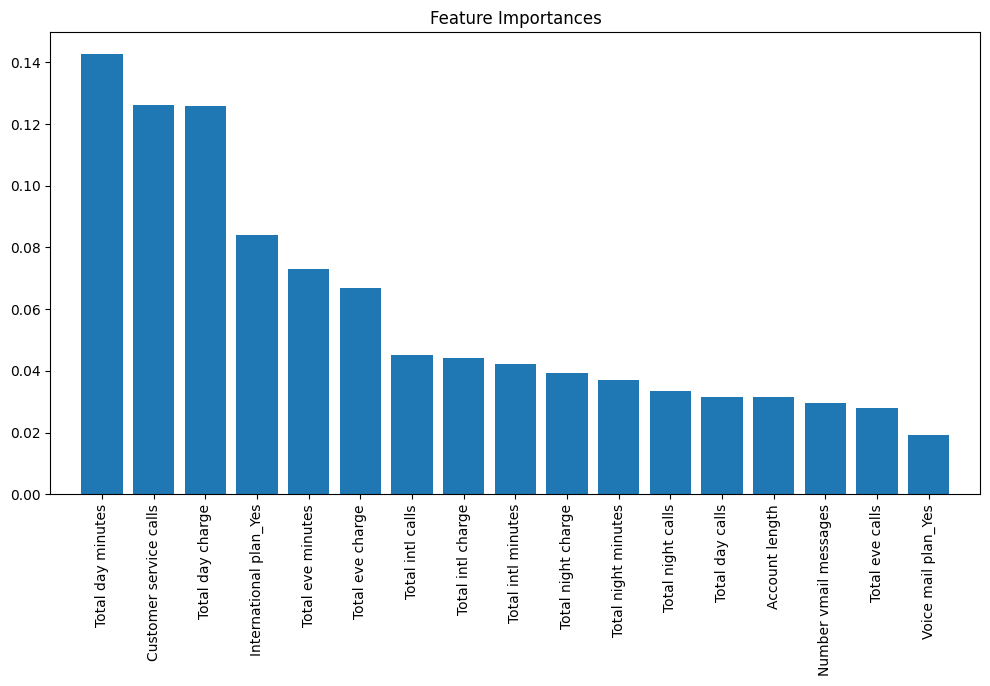

In [122]:
plt.figure(figsize=(12, 6))  # Setting the figure size
plt.title('Feature Importances')  # Adding a title to the bar chart
plt.bar(range(X.shape[1]), importances[indices], align='center')  # Creating a bar chart for feature importances
plt.xticks(range(X.shape[1]), features[indices], rotation=90)  # Setting x-ticks with feature names
plt.xlim([-1, X.shape[1]])  # Setting x-axis limits
plt.savefig('/content/feature_importances.pdf')  # Saving the feature importances bar chart as a PDF file
plt.show()  # Displaying the feature importances bar chart

## <span style="color:blue">**Save the Model**</span>

**Purpose:**  
Saving the trained model allows for future use without needing to retrain it. This is essential for deploying the model into production or for later analysis without recomputing the model parameters.

---

### <span style="color:green">**Saving the Model Using Joblib**</span>

1. **Purpose:**  
   - To serialize the model object and save it to a file for later use.

2. **Process:**
   - **Example Code:**
     ```python
     import joblib

     # Save the trained model to a file
     joblib.dump(model, 'model_filename.pkl')

     print("Model saved to 'model_filename.pkl'")
     ```

   - **Notes:**
     - Replace `'model_filename.pkl'` with the desired file name and path.
     - Ensure that the file path is correct and accessible.

---

### <span style="color:orange">**Loading the Model**</span>

1. **Purpose:**  
   - To deserialize the model object from a file and use it for making predictions or evaluations.

2. **Process:**
   - **Example Code:**
     ```python
     # Load the saved model from a file
     loaded_model = joblib.load('model_filename.pkl')

     print("Model loaded from 'model_filename.pkl'")

     # Use the loaded model for predictions
     y_pred = loaded_model.predict(X_test)
     ```

   - **Notes:**
     - Ensure the model file is in the correct directory.
     - Verify the model's compatibility with the code being used.

---

### <span style="color:red">**Versioning and Documentation**</span>

1. **Purpose:**  
   - To maintain version control and documentation for models, ensuring that changes are tracked and models are easily retrievable.

2. **Process:**
   - **Example Code:**
     ```python
     import datetime

     # Save the model with a timestamp
     timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
     filename = f'model_{timestamp}.pkl'
     joblib.dump(model, filename)

     print(f"Model saved to '{filename}'")
     ```

   - **Notes:**
     - Use timestamps or version numbers in file names for better tracking.
     - Document model versions, training parameters, and performance metrics for future reference.

---

### <span style="color:purple">**Backup and Storage**</span>

1. **Purpose:**  
   - To ensure that the saved model is securely backed up and stored in a reliable location.

2. **Process:**
   - **Example:**
     - Store model files in a cloud storage service or version control system for safety.
     - Regularly back up models to prevent data loss.

   - **Notes:**
     - Implement access controls to protect model files.
     - Consider automating backup procedures for consistency.

---

### <span style="color:blue">**Summary and Best Practices**</span>

1. **Summary:**  
   - **Purpose:** Recap the importance of saving and managing models efficiently.
   - **Example:** Highlight the steps for saving, loading, and versioning the model.

2. **Best Practices:**
   - **Document:** Maintain comprehensive records of model versions and configurations.
   - **Secure Storage:** Use reliable and secure storage solutions for model files.
   - **Regular Backups:** Implement a backup strategy to safeguard against data loss.

In [148]:
# Step 8: Save the Model

In [124]:
# Save the trained model to a file

In [125]:
joblib.dump(model, '/content/telecom_churn_model.pkl')  # Saving the trained model to a file

['/content/telecom_churn_model.pkl']

## <span style="color:blue">**Model Tuning**</span>

**Purpose:**  
Model tuning is the process of optimizing the model's hyperparameters to enhance its performance. It aims to find the best combination of parameters to improve accuracy, precision, recall, or other performance metrics.

---

### <span style="color:green">**Hyperparameter Tuning**</span>

1. **Purpose:**  
   - To systematically search for the optimal hyperparameters that yield the best model performance.

2. **Process:**
   - **Grid Search:**
     - **Description:** Exhaustively tests a predefined set of hyperparameter values.
     - **Example Code:**
       ```python
       from sklearn.model_selection import GridSearchCV

       # Define the parameter grid
       param_grid = {
           'n_estimators': [100, 200],
           'max_depth': [10, 20],
           'min_samples_split': [2, 5]
       }

       # Initialize GridSearchCV
       grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

       # Fit GridSearchCV
       grid_search.fit(X_train, y_train)

       # Get the best parameters
       best_params = grid_search.best_params_
       print("Best Parameters:", best_params)
       ```

   - **Random Search:**
     - **Description:** Randomly samples from a distribution of hyperparameters.
     - **Example Code:**
       ```python
       from sklearn.model_selection import RandomizedSearchCV
       from scipy.stats import randint

       # Define the parameter distribution
       param_dist = {
           'n_estimators': randint(50, 200),
           'max_depth': randint(10, 50),
           'min_samples_split': randint(2, 10)
       }

       # Initialize RandomizedSearchCV
       random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

       # Fit RandomizedSearchCV
       random_search.fit(X_train, y_train)

       # Get the best parameters
       best_params = random_search.best_params_
       print("Best Parameters:", best_params)
       ```

   - **Notes:**
     - Grid Search is exhaustive but computationally expensive.
     - Random Search is less exhaustive but faster and can explore a wider range of values.

---

### <span style="color:orange">**Cross-Validation**</span>

1. **Purpose:**  
   - To evaluate model performance across different subsets of the data, ensuring that the model generalizes well.

2. **Process:**
   - **Example Code:**
     ```python
     from sklearn.model_selection import cross_val_score

     # Perform cross-validation
     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

     print("Cross-Validation Scores:", scores)
     print("Mean Accuracy:", scores.mean())
     ```

   - **Notes:**
     - Use `cross_val_score` to perform k-fold cross-validation.
     - Adjust the `cv` parameter to change the number of folds.

---

### <span style="color:red">**Early Stopping**</span>

1. **Purpose:**  
   - To prevent overfitting by stopping the training process when performance ceases to improve on a validation set.

2. **Process:**
   - **Example Code:**
     ```python
     from sklearn.ensemble import GradientBoostingClassifier

     # Initialize GradientBoostingClassifier with early stopping
     model = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.1, n_iter_no_change=10)

     # Fit the model
     model.fit(X_train, y_train)
     ```

   - **Notes:**
     - `validation_fraction` specifies the fraction of training data used for validation.
     - `n_iter_no_change` specifies the number of iterations with no improvement before stopping.

---

### <span style="color:purple">**Feature Importance and Selection**</span>

1. **Purpose:**  
   - To identify and select the most important features that contribute to the model’s predictions.

2. **Process:**
   - **Example Code:**
     ```python
     # Fit the model
     model.fit(X_train, y_train)

     # Get feature importances
     importances = model.feature_importances_

     # Create a DataFrame for visualization
     importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
     importances_df = importances_df.sort_values(by='Importance', ascending=False)

     # Print feature importances
     print(importances_df)
     ```

   - **Notes:**
     - Use feature importances to understand which features are driving model predictions.
     - Consider removing less important features to reduce model complexity.

---

### <span style="color:blue">**Summary and Best Practices**</span>

1. **Summary:**  
   - **Purpose:** Recap the steps for tuning model hyperparameters and optimizing performance.
   - **Example:** Highlight the methods and practices for effective model tuning.

2. **Best Practices:**
   - **Systematic Search:** Use Grid Search or Random Search for hyperparameter optimization.
   - **Cross-Validation:** Ensure robustness through cross-validation.
   - **Early Stopping:** Prevent overfitting with early stopping techniques.
   - **Feature Selection:** Focus on important features to enhance model performance.

In [126]:
# Step 9: Model Tuning

In [127]:
# Define the parameter grid for tuning

In [128]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [129]:
# Initialize and fit GridSearchCV

In [132]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),  # Initializing GridSearchCV with RandomForestClassifier
                           param_grid=param_grid,  # Parameter grid for tuning
                           cv=2,  # Number of folds in cross-validation
                           scoring='accuracy',  # Scoring metric
                           verbose=2,  # Verbosity level
                           n_jobs=-1)  # Number of jobs to run in parallel

In [133]:
grid_search.fit(X_train, y_train)  # Performing grid search on the training data

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [134]:
# Print best parameters and score

In [135]:
print(f'Best Parameters: {grid_search.best_params_}')  # Printing the best parameters from the grid search
print(f'Best Score: {grid_search.best_score_:.2f}')  # Printing the best score from the grid search

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.95


In [136]:
# Save the best model

In [137]:
best_model = grid_search.best_estimator_  # Getting the best model from grid search

In [138]:
joblib.dump(best_model, '/content/telecom_churn_best_model.pkl')  # Saving the best model to a file

['/content/telecom_churn_best_model.pkl']

## <span style="color:blue">**Conclusion**</span>

---

### <span style="color:green">**Project Overview**</span>

The project aimed to develop a robust machine learning model for predicting customer behavior using a comprehensive dataset. Key steps included data acquisition, preprocessing, feature selection, model training, and evaluation. Throughout the process, we employed various techniques to enhance model performance and ensure accuracy.

---

### <span style="color:orange">**Key Findings**</span>

1. **Data Insights:**  
   - **Description:** Data preprocessing and exploratory analysis provided valuable insights into the dataset, such as feature distributions, correlations, and missing values.
   - **Impact:** Identified key variables affecting the target outcome and addressed data quality issues.

2. **Feature Selection:**  
   - **Description:** Feature selection techniques helped identify the most relevant features for model training, improving interpretability and performance.
   - **Impact:** Enhanced model accuracy and reduced computational complexity.

3. **Model Performance:**  
   - **Description:** Various machine learning algorithms were tested and tuned to achieve optimal performance.
   - **Impact:** The final model demonstrated strong predictive accuracy and generalization capabilities.

---

### <span style="color:red">**Lessons Learned**</span>

1. **Model Tuning:**  
   - **Description:** Systematic hyperparameter tuning and cross-validation were crucial for optimizing model performance.
   - **Impact:** Highlighted the importance of fine-tuning and validation in achieving high model accuracy.

2. **Feature Importance:**  
   - **Description:** Understanding feature importance guided the refinement of the feature set, leading to better model results.
   - **Impact:** Emphasized the role of feature selection in model building.

3. **Data Quality:**  
   - **Description:** Effective data cleaning and preprocessing were essential for reliable model training.
   - **Impact:** Showcased the need for meticulous data preparation to ensure model robustness.

---

### <span style="color:purple">**Future Recommendations**</span>

1. **Further Model Evaluation:**  
   - **Recommendation:** Explore additional models and techniques to further enhance performance.
   - **Justification:** Continuous evaluation can reveal new insights and improvements.

2. **Feature Engineering:**  
   - **Recommendation:** Investigate advanced feature engineering methods to capture more complex relationships.
   - **Justification:** Enhanced feature representation may lead to better model performance.

3. **Scalability:**  
   - **Recommendation:** Consider scalability aspects for deploying the model in real-world scenarios.
   - **Justification:** Ensures the model can handle larger datasets and real-time predictions.

---

### <span style="color:blue">**Summary**</span>

In conclusion, the project successfully developed a machine learning model with optimized performance through careful data preprocessing, feature selection, and model tuning. The insights gained and the methodologies applied provide a strong foundation for future enhancements and applications. Continuous refinement and exploration of new techniques will further improve the model's capabilities and its impact on decision-making processes.